In [ ]:
pip install pca

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9672 sha256=81bb4d3021a8ca719ba10afd95d4a4688b32d4f51b89e2c59d24475704835fe7
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pca import pca

In [ ]:
pd.set_option('display.precision', 3)
df = pd.read_csv('sing.csv')

In [ ]:
df

,singer,romantic,trendy,rocky,danceable,relaxing,boring
0,Andy,0.925,-0.795,-0.771,0.448,1.046,-0.161
1,Billy,1.315,-0.883,-0.865,-1.368,0.952,-0.671
2,Danny,0.984,-0.769,-0.876,-0.059,1.054,1.018
3,Frankie,1.086,-1.054,-0.758,-1.732,0.789,-0.856
4,Gary,0.464,-1.096,-0.884,0.010,0.788,0.430
5,Howie,0.607,-1.023,-1.326,0.436,0.894,0.951
6,Joey,-0.161,1.203,0.907,-0.132,-0.446,-1.938
7,Louie,-0.950,0.721,0.817,0.898,-1.218,1.119
8,Mickey,-1.222,0.799,0.759,-0.708,-0.918,-0.813
9,Paulie,-0.978,1.208,0.546,2.090,-0.442,-0.123


In [ ]:
from pca import pca
df_pca = pca(n_components = 5, normalize=True)

# Fit transform
pca_results = df_pca.fit_transform(df.iloc[:, 1:])


print(pca_results['PC'].std()**2)

[pca] >Processing dataframe..
[pca] >Normalizing input data per feature (zero mean and unit variance)..
[pca] >The PCA reduction is performed on the [6] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[5]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]
PC1    4.278
PC2    1.476
PC3    0.584
PC4    0.174
PC5    0.021
dtype: float64


In [ ]:
print(pca_results)

{'loadings':      romantic  trendy  rocky  danceable  relaxing  boring
PC1    -0.483   0.486  0.481      0.249    -0.487   0.010
PC2     0.018   0.115  0.143     -0.600    -0.084  -0.774
PC3     0.046   0.173 -0.194      0.708     0.284  -0.590
PC4     0.707   0.425  0.499      0.012     0.225   0.139
PC5    -0.344   0.633 -0.327     -0.275     0.514   0.183, 'PC':       PC1    PC2    PC3    PC4    PC5
0  -1.675 -0.436  0.799  0.156 -0.193
1  -2.392  1.106 -0.236  0.238  0.015
2  -1.868 -1.083 -0.271  0.323  0.215
3  -2.324  1.489 -0.503 -0.021 -0.070
4  -1.629 -0.678 -0.019 -0.358 -0.087
5  -1.824 -1.430  0.116 -0.344  0.095
6   1.321  1.965  0.989  0.502 -0.029
7   2.120 -1.170 -0.468 -0.069 -0.159
8   1.678  1.368 -0.364 -0.494  0.264
9   2.148 -0.965  1.551  0.003  0.102
10  2.463 -0.749 -1.239  0.733 -0.008
11  1.981  0.581 -0.354 -0.668 -0.145, 'explained_var': array([0.65355464, 0.87900918, 0.96830299, 0.99491559, 0.99813961]), 'model': PCA(copy=True, iterated_power='auto', n_co

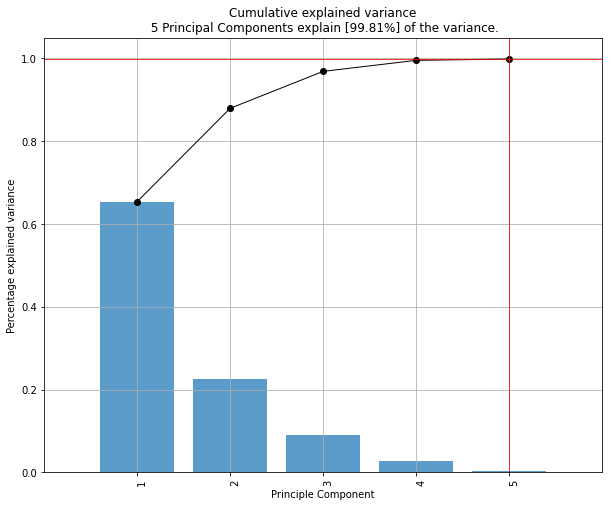

<Figure size 432x288 with 0 Axes>

In [ ]:
# Plot explained variance
fig, ax = df_pca.plot()

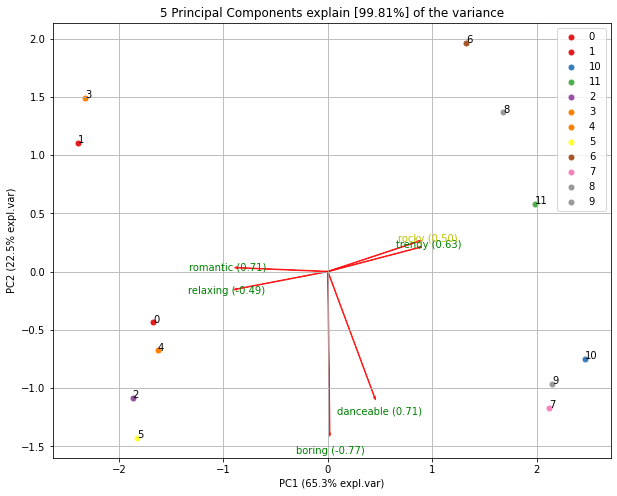

In [ ]:
# Make biplot with the number of features
fig, ax = df_pca.biplot()#(n_feat=8)

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=5)

In [ ]:
pca.fit(df.iloc[:, 1:])

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
print(pca.explained_variance_ratio_)

[0.65352982 0.22547594 0.08929886 0.02661113 0.0032239 ]


In [ ]:
loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df.columns.values[:-1]
loadings_df = loadings_df.set_index('variable')
loadings_df
# output

# positive and negative values in component loadings reflects the positive and negative 
# correlation of the variables with the PCs. Except A and B, all other variables have 
# positive projection on first PC.

,PC1,PC2,PC3,PC4,PC5
variable,,,,,
singer,-0.483,0.018,0.046,0.707,-0.345
romantic,0.486,0.115,0.173,0.425,0.633
trendy,0.481,0.143,-0.194,0.499,-0.327
rocky,0.249,-0.600,0.708,0.012,-0.275
danceable,-0.487,-0.084,0.284,0.225,0.514
relaxing,0.010,-0.774,-0.590,0.139,0.183


In [ ]:
print(-0.483*0.925-0.795*0.486-0.771*0.481+0.448*0.249-0.487*1.046-0.161*0.010)


-1.603456


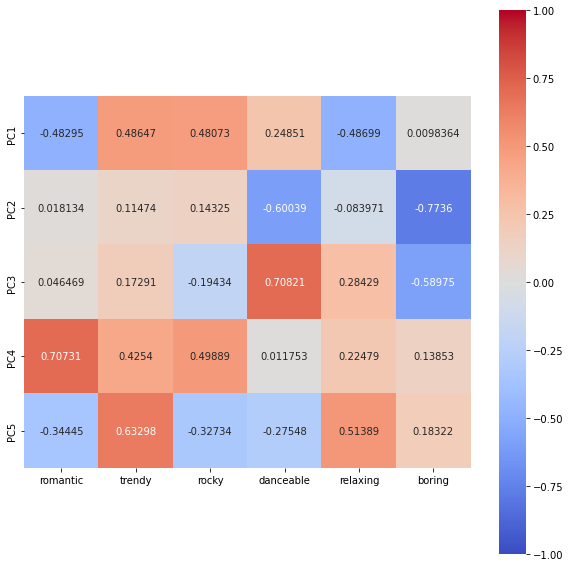

In [101]:
import seaborn as sns
fig, ax = plt.subplots(figsize=(10,10))
map = sns.heatmap(pca_results['loadings'], annot=True, fmt='.5g', cmap="coolwarm", vmin=-1, vmax=1, center= 0, square=True)